In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.probability import FreqDist
from wordcloud import WordCloud,STOPWORDS
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yixuan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
business=pd.read_csv('bakery_business.csv')
review=pd.read_csv('bakery_review.csv')

## Drawing histogram

/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


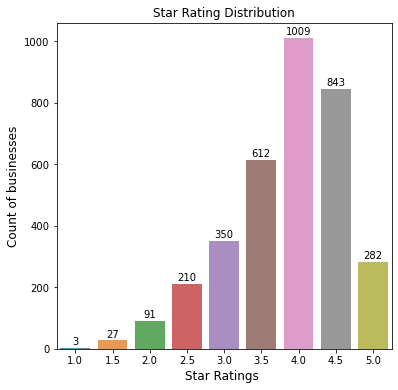

In [9]:
x=business['stars'].value_counts()
x=x.sort_index()

plt.figure(figsize=(6,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution")
plt.ylabel('Count of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.savefig("stars.jpg")
plt.show()

/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


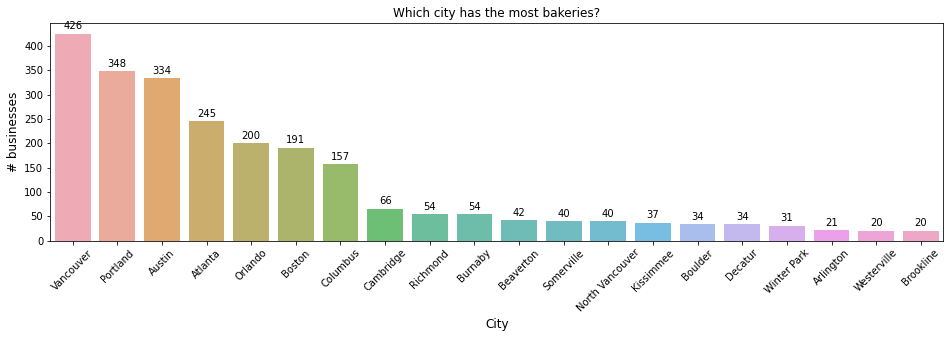

In [10]:
#Get the distribution of the ratings
x=business['city'].value_counts()
x=x.sort_values(ascending=False)
x=x.iloc[0:20]
plt.figure(figsize=(16,4))
ax = sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Which city has the most bakeries?")
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
plt.savefig('city_count.jpg')
plt.show()

## Find the most popular bakery here

So, we need to find the most popular bakery in our dataset

The most popular bakery is not the bakery with the highest stars, but the bakery with the most review count. So we sorted the bakery with the review count and chose the first one.

In [11]:
business.sort_values(by=['review_count'],axis=0,ascending=False,inplace=True)
business[['business_id','name','address','city','stars','review_count']].head()

,business_id,name,address,city,stars,review_count
1371,4CxF8c3MB7VAdY8zFb2cZQ,Voodoo Doughnut - Old Town,22 SW 3rd Ave,Portland,3.5,9185
2401,PrsvO1rzkgg6qFizlAoEtg,Mike's Pastry,300 Hanover St,Boston,4.0,7298
908,OQ2oHkcWA8KNC1Lsvj1SBA,Screen Door,2337 E Burnside St,Portland,4.5,7219
119,H_RM2u1WWGU1HkKZrYq2Ow,Blue Star Donuts,"1155 SW Morrison St, Ste 102",Portland,4.0,4011
2205,o_L9Ss4boqq6ZEF9xeSH6Q,Salt & Straw,838 NW 23rd Ave,Portland,4.5,3672


In [12]:
business[['Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'hours', 'Monday', 'Sunday']]

,Tuesday,Wednesday,Thursday,Friday,Saturday,hours,Monday,Sunday
1371,8:0-21:0,8:0-21:0,8:0-20:0,8:0-21:0,10:0-21:0,1,0:0-0:0,8:0-21:0
2401,8:0-22:0,8:0-22:0,8:0-22:0,8:0-23:0,8:0-23:0,1,8:0-22:0,8:0-22:0
908,11:0-20:0,11:0-20:0,8:0-14:0,9:0-21:0,9:0-21:0,1,11:0-20:0,9:0-20:0
119,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,7:0-20:0,1,7:0-20:0,7:0-20:0
2205,12:0-23:0,13:0-20:0,12:0-23:0,12:0-23:0,12:0-23:0,1,12:0-23:0,12:0-23:0
...,...,...,...,...,...,...,...,...
368,6:0-19:30,6:0-19:30,6:0-19:30,6:0-19:30,6:0-19:30,1,6:0-19:30,6:0-19:30
664,6:0-21:0,6:0-21:0,6:0-21:0,6:0-21:0,7:0-21:0,1,6:0-21:0,7:0-17:0
1806,5:0-21:0,5:0-21:0,5:0-21:0,5:0-21:0,5:0-21:0,1,5:0-21:0,5:0-21:0
3314,9:0-18:0,9:0-18:0,9:0-18:0,9:0-16:0,9:0-15:0,1,0:0-0:0,NaN


In [13]:
print(business.iloc[0])

business_id        4CxF8c3MB7VAdY8zFb2cZQ
name           Voodoo Doughnut - Old Town
address                     22 SW 3rd Ave
city                             Portland
state                                  OR
                          ...            
vegan                                 NaN
kosher                                NaN
halal                                 NaN
soy-free                              NaN
vegetarian                            NaN
Name: 1371, Length: 98, dtype: object


Then, consider the most popular bakery in Portland

In [14]:
bakery_pop=review[review['business_id']=='4CxF8c3MB7VAdY8zFb2cZQ']

In [15]:
bakery_pop.reset_index(inplace=True)

## Drawing a star distribution in reviews of this most popular bakery

/Users/yixuan/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


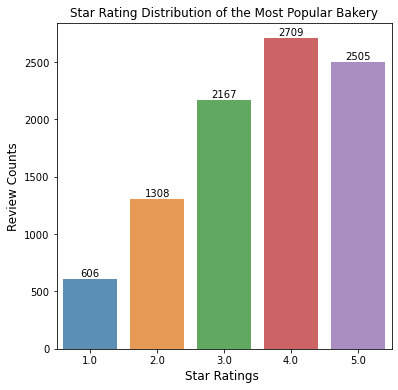

In [16]:
x=bakery_pop['stars'].value_counts()
x=x.sort_index()

plt.figure(figsize=(6,6))
ax= sns.barplot(x.index, x.values, alpha=0.8)
plt.title("Star Rating Distribution of the Most Popular Bakery")
plt.ylabel('Review Counts', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.savefig("stars_popular.jpg")
plt.show()

## Consider the word frequency

### Delete the stopword and seperate words

Then, calculating the word frequency after delete the stopwords

In [17]:
def remove_punc_stopword(text):
    remove_punc=[word for word in text if word not in string.punctuation]
    remove_punc=''.join(remove_punc)
    return [word.lower() for word in remove_punc.split() if word.lower() not in stopwords.words('english')]

In [18]:
bakery_pop['text_seperate']=bakery_pop['text'].apply(remove_punc_stopword)
bakery_pop.count()

<ipython-input-18-6a1f8e887a28>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bakery_pop['text_seperate']=bakery_pop['text'].apply(remove_punc_stopword)


index            9295
review_id        9295
user_id          9295
business_id      9295
stars            9295
useful           9295
funny            9295
cool             9295
text             9295
date             9295
text_seperate    9295
dtype: int64

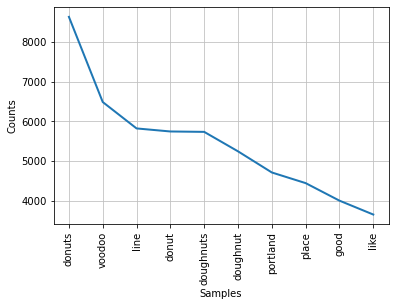

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [19]:
bakery_pop=bakery_pop.reset_index(drop=True)
words_split= []
for i in range(0,9295): 
    for word in bakery_pop['text_seperate'][i]:
        words_split.append(word)
FreqDist(words_split).plot(10,cumulative=False)

### Adding a new criterion of good or bad (sentimental analysis)

In [20]:
nrows=bakery_pop.shape[0]
bakery_pop['polarity']=''
bakery_pop['subjectivity']=''

In [21]:
for i in range(0,nrows):
    sentence=bakery_pop['text'][i]
    blob=TextBlob(sentence)
    bakery_pop['polarity'][i]=blob.sentiment.polarity
    bakery_pop['subjectivity'][i]=blob.sentiment.subjectivity

<ipython-input-21-6008f2f050c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bakery_pop['polarity'][i]=blob.sentiment.polarity
<ipython-input-21-6008f2f050c8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bakery_pop['subjectivity'][i]=blob.sentiment.subjectivity


In [22]:
bakery_pop.sort_values(by='polarity',ascending=False,inplace=True)
bakery_pop.reset_index(inplace=True)

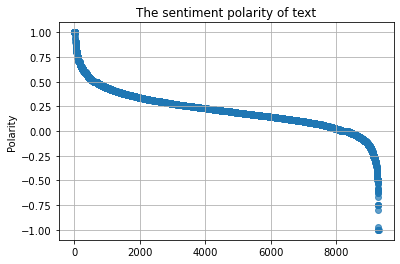

In [23]:
plt.scatter(bakery_pop.index,bakery_pop['polarity'],alpha=0.7)
plt.ylabel('Polarity')
plt.grid()
plt.title('The sentiment polarity of text')
plt.savefig('Sentiment_polarity.jpg')
plt.show()

### Bad reviews for the most popular bakery

In [24]:
review_bad=bakery_pop[(bakery_pop['stars']<3)&(bakery_pop['polarity']<0)]

In [25]:
review_bad.head()

,level_0,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_seperate,polarity,subjectivity
8319,8911,135853,tcBLu50T9azxLETgOXDSLg,EohFghdL78kvQY-eA1wYfg,4CxF8c3MB7VAdY8zFb2cZQ,1.0,2,1,0,When we moved to Portland I was prepared to br...,2014-08-22 22:54:06,"[moved, portland, prepared, break, nosugar, di...",-0.0,0.513272
8321,5520,120096,_PSejULcCUFoQjKVvYeo5g,UDLc7HG6oHzRp-ec6oQ45w,4CxF8c3MB7VAdY8zFb2cZQ,2.0,1,1,1,"As a Portland local, I kind of hate this place...",2015-04-09 21:11:32,"[portland, local, kind, hate, place, used, nic...",-0.000223,0.644643
8327,4582,116832,8zgMLiqE-g8XjcxvrqNQhA,NNBhYjEvdtxhgp1Wp47e8w,4CxF8c3MB7VAdY8zFb2cZQ,2.0,0,0,0,2.5 stars for interesting decor an. Concept bu...,2015-07-15 04:22:21,"[25, stars, interesting, decor, concept, donut...",-0.00125,0.581667
8328,2728,110367,YTUW0gJZMYyTUhw5AE6pQg,ilwMjvV8ljJb7mSorEciWA,4CxF8c3MB7VAdY8zFb2cZQ,2.0,2,0,0,Yes- I realize I may be the only Portlander wh...,2011-01-19 04:41:47,"[yes, realize, may, portlander, fanbut, though...",-0.001562,0.648148
8333,8863,135555,Nr_ffY_VSRuKW1XPRuQ4Ig,DmtgMXZTKmTILg6OyzhJbQ,4CxF8c3MB7VAdY8zFb2cZQ,1.0,1,0,0,Ok-trekking with kids who are 6 and 3 walking ...,2019-04-21 05:17:40,"[oktrekking, kids, 6, 3, walking, multitude, p...",-0.002143,0.624286


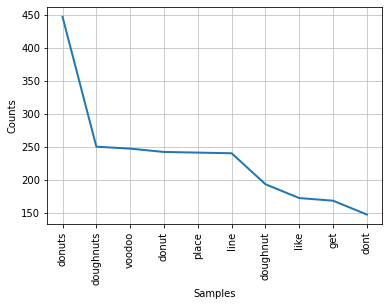

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [26]:
review_bad=review_bad.reset_index(drop=True)
words_split_bad=[]
for i in range(0,493): 
    for word in review_bad['text_seperate'][i]:
        words_split_bad.append(word)
FreqDist(words_split_bad).plot(10,cumulative=False)

In [27]:
review_bad['text']

0      When we moved to Portland I was prepared to br...
1      As a Portland local, I kind of hate this place...
2      2.5 stars for interesting decor an. Concept bu...
3      Yes- I realize I may be the only Portlander wh...
4      Ok-trekking with kids who are 6 and 3 walking ...
                             ...                        
488    yeah....donuts are donuts...just the worst foo...
489    We went there with some friends 2 weeks ago. T...
490    Bleh, it's a frick'n doughnut with excess crap...
491    I was very disappointed that voodoo Donuts doe...
492    The worst of tourist traps. Terrible service, ...
Name: text, Length: 493, dtype: object

### Select some useful bad reviews

In [28]:
useful_bad_reviews=review_bad[review_bad['useful']>0]

In [29]:
useful_bad_reviews['text']

0      When we moved to Portland I was prepared to br...
1      As a Portland local, I kind of hate this place...
3      Yes- I realize I may be the only Portlander wh...
4      Ok-trekking with kids who are 6 and 3 walking ...
6      Yes Voodoo's is a Portland institution, but le...
                             ...                        
478    Why would you wait over an hour for overhyped ...
480    I've never waited in the three-hour line, and ...
481    Worst doughnut I have ever had!  Dry and taste...
487    Horrible!!!! My daughter had the Oreo Cookie D...
491    I was very disappointed that voodoo Donuts doe...
Name: text, Length: 180, dtype: object

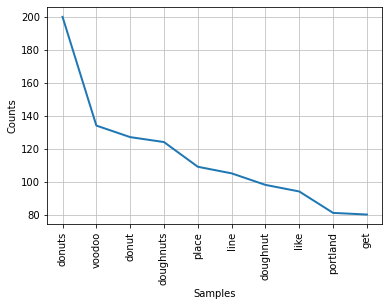

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [30]:
useful_bad_reviews=useful_bad_reviews.reset_index(drop=True)
words_split_useful=[]
for i in range(0,180): 
    for word in useful_bad_reviews['text_seperate'][i]:
        words_split_useful.append(word)
FreqDist(words_split_useful).plot(10,cumulative=False)

In [31]:
#remove all the donuts
target=['doughnuts','doughnut','donuts','donut','place']
def removefunction(list1):
    new=[]
    for item in list1:
        if item not in target:
            new.append(item)
    return new

In [32]:
useful_bad_reviews['text_seperate_new']=useful_bad_reviews['text_seperate'].apply(removefunction)
useful_bad_reviews.head()

,level_0,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_seperate,polarity,subjectivity,text_seperate_new
0,8911,135853,tcBLu50T9azxLETgOXDSLg,EohFghdL78kvQY-eA1wYfg,4CxF8c3MB7VAdY8zFb2cZQ,1.0,2,1,0,When we moved to Portland I was prepared to br...,2014-08-22 22:54:06,"[moved, portland, prepared, break, nosugar, di...",-0.0,0.513272,"[moved, portland, prepared, break, nosugar, di..."
1,5520,120096,_PSejULcCUFoQjKVvYeo5g,UDLc7HG6oHzRp-ec6oQ45w,4CxF8c3MB7VAdY8zFb2cZQ,2.0,1,1,1,"As a Portland local, I kind of hate this place...",2015-04-09 21:11:32,"[portland, local, kind, hate, place, used, nic...",-0.000223,0.644643,"[portland, local, kind, hate, used, nice, litt..."
2,2728,110367,YTUW0gJZMYyTUhw5AE6pQg,ilwMjvV8ljJb7mSorEciWA,4CxF8c3MB7VAdY8zFb2cZQ,2.0,2,0,0,Yes- I realize I may be the only Portlander wh...,2011-01-19 04:41:47,"[yes, realize, may, portlander, fanbut, though...",-0.001562,0.648148,"[yes, realize, may, portlander, fanbut, though..."
3,8863,135555,Nr_ffY_VSRuKW1XPRuQ4Ig,DmtgMXZTKmTILg6OyzhJbQ,4CxF8c3MB7VAdY8zFb2cZQ,1.0,1,0,0,Ok-trekking with kids who are 6 and 3 walking ...,2019-04-21 05:17:40,"[oktrekking, kids, 6, 3, walking, multitude, p...",-0.002143,0.624286,"[oktrekking, kids, 6, 3, walking, multitude, p..."
4,1658,106542,mSHmNYgCGffvcKUULbvSdQ,QEpNF4Hag6_W9Stc-1Frvg,4CxF8c3MB7VAdY8zFb2cZQ,2.0,1,0,0,"Yes Voodoo's is a Portland institution, but le...",2014-09-12 04:39:55,"[yes, voodoos, portland, institution, lets, fa...",-0.002381,0.46076,"[yes, voodoos, portland, institution, lets, fa..."


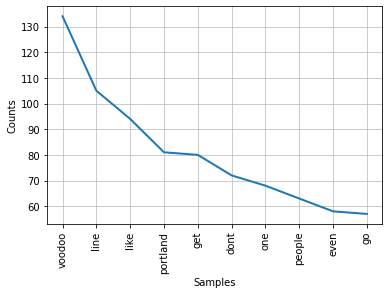

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [33]:
useful_bad_reviews=useful_bad_reviews.reset_index(drop=True)
words_split_useful=[]
for i in range(0,180): 
    for word in useful_bad_reviews['text_seperate_new'][i]:
        words_split_useful.append(word)
FreqDist(words_split_useful).plot(10,cumulative=False)

In [34]:
FreqDist(words_split_useful)

FreqDist({'voodoo': 134, 'line': 105, 'like': 94, 'portland': 81, 'get': 80, 'dont': 72, 'one': 68, 'people': 63, 'even': 58, 'go': 57, ...})

In [35]:
#what does line mean in good reviews
def searchline(list2):
    for item in list2:
        if item=='line':
            return 1

In [47]:
useful_bad_reviews['line']=useful_bad_reviews['text_seperate_new'].apply(searchline)
useful_bad_reviews['text'][useful_bad_reviews['line']==1][17]

'We came here after a night of bar hopping on a saturday night. There was a line but service was quick. I don\'t know what everybody\'s talkin about with the mean man and bad service. Our service was fine, not rude or unfriendly at all. And it being in the bad part of Portland... I guess. Looks normal to me, I mean you have seen a homeless person before haven\'t you.. or a goth. Maybe I\'m so use to places like Chicago?.. with it being rough around the edges and learning hey if you snooze you lose!! Maybe portland or westcoast peeps are too nice and squeaky clean.. It\'s a lil donut shop, do ya expect some cuddles with your donut too? geezus. I didn\'t feel scared walkin down the street here. I was expecting much worse. The inside of the shop can maybe use a scrub though. But I\'d come back. I\'d rather they keep it real and put the dirtiness out in the open rather than secretly dropping my donut on the floor and sneezing on it in the back which I wouldn\'t be too surprised.\n\nThe don

Check the useful bad reviews manually, we can find most of the reviews mentioned a word "Overrated". And most of these reviews mentioned the special doughnuts here, its special actually but not tasting good. Some of reviews said it is a touristy place and should be waiting in a long line.

### Positive reviews for the most popular bakery

In [48]:
review_good=bakery_pop[(bakery_pop['stars']>3)&(bakery_pop['polarity']>0)]
review_good

,level_0,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_seperate,polarity,subjectivity
1,7939,129669,T6tKjXF06D38aIIP0wFYTQ,sON0GqAYLtLiUIpkvP4beQ,4CxF8c3MB7VAdY8zFb2cZQ,5.0,0,0,0,Voodoo Doughnut is a must when traveling throu...,2018-09-16 17:43:11,"[voodoo, doughnut, must, traveling, portland, ...",1.0,0.3
2,2861,110766,OTtbL6x6IARVUqMyH6InMA,CnTaDHiXcNSA4gNG0zRjXg,4CxF8c3MB7VAdY8zFb2cZQ,5.0,0,0,0,Delicious way to spend your calories! They wor...,2015-01-10 14:39:58,"[delicious, way, spend, calories, work, 247]",1.0,1.0
3,3932,114620,YYkldp4fN94GpjCASQWmwA,W0_7ulegFG9nyW4kzxd8Jw,4CxF8c3MB7VAdY8zFb2cZQ,5.0,0,0,0,Best donuts you can get. Just go there. In tow...,2014-05-19 21:03:05,"[best, donuts, get, go, town, weekend, go, nev...",1.0,0.3
4,3706,113848,-LDVTlMb5PNfcG4sVxjqwg,iPtLKxN8CtLG5pN-I7dM2g,4CxF8c3MB7VAdY8zFb2cZQ,5.0,0,0,0,Ummmm maple bacon donuts? Helloooooooo teh awe...,2016-07-11 02:42:01,"[ummmm, maple, bacon, donuts, helloooooooo, te...",1.0,1.0
5,8638,133967,ves0qvP9IjT0QO7tCUyhgQ,uSDb8G6_YfYmjvVu9aFYDA,4CxF8c3MB7VAdY8zFb2cZQ,5.0,0,0,0,Best donuts!! I wish they had one on utah! If ...,2019-04-21 22:45:05,"[best, donuts, wish, one, utah, youre, even, c...",1.0,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8182,7830,129069,xJrA1Mj1b4VFTP0IcT01gg,xSV3Grv8Fymv07w3qpAY9Q,4CxF8c3MB7VAdY8zFb2cZQ,4.0,4,3,2,You've heard it before from people who've been...,2010-06-14 06:13:47,"[youve, heard, people, whove, go, voodoo, try,...",0.002381,0.45127
8183,8974,136325,pY31lZe5oQMyKHZNUeaPDQ,Fop_SK3pFemDf-RtaS5JQQ,4CxF8c3MB7VAdY8zFb2cZQ,4.0,3,0,2,So I want to preface this review by saying the...,2012-09-05 00:55:45,"[want, preface, review, saying, 4, stars, doug...",0.001806,0.559033
8185,117,100882,G_nZd6G9IA_ChCwmJpdECw,WXUFtWk_zLQuUEFUjpOcOA,4CxF8c3MB7VAdY8zFb2cZQ,4.0,0,0,0,Awesome donuts! (maple and bacon was killer). ...,2012-09-10 21:03:27,"[awesome, donuts, maple, bacon, killer, stupid...",0.0,1.0
8186,618,102749,A6QlsGQsavNB0K88yoClYg,LSprnMuXRbQZJHM74Q59uw,4CxF8c3MB7VAdY8zFb2cZQ,5.0,0,0,0,"If you go on a weekday afternoon, you won't ha...",2015-04-29 20:02:40,"[go, weekday, afternoon, wont, wait, crazy, li...",0.0,0.9


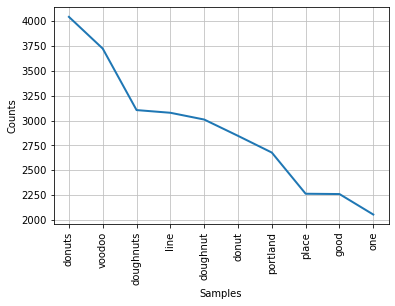

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [49]:
review_good=review_good.reset_index(drop=True)
words_split_good=[]
for i in range(0,4867): 
    for word in review_good['text_seperate'][i]:
        words_split_good.append(word)
FreqDist(words_split_good).plot(10,cumulative=False)

### Selecting some useful good reviews

In [50]:
useful_good_reviews=review_good[(review_good['useful']>0)&(review_good['stars']==5)]
useful_good_reviews['text']#[32]

9       As an out-of-town donut fiend I was entranced ...
11      Best Doughnuts in Portland! A must see for any...
12      I AM FROM CALIFORNIA! Let me say this! IT LIVE...
27      Just one word - legendary! A must-visit. You p...
39      The best damn doughnut shop ever!!!\n\nThe app...
                              ...                        
4836    I think the people here are smoking something ...
4839    So is this the only reason to visit Portland? ...
4844    Great place.  Good doughnuts with an infinite ...
4855    Hard to beat these guys.   They have so many v...
4860    5 stars for the experience. This place has bee...
Name: text, Length: 721, dtype: object

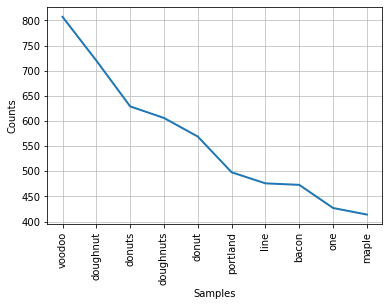

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [51]:
useful_good_reviews=useful_good_reviews.reset_index(drop=True)
words_split_good=[]
for i in range(0,721): 
    for word in useful_good_reviews['text_seperate'][i]:
        words_split_good.append(word)
FreqDist(words_split_good).plot(10,cumulative=False)

In [52]:
useful_good_reviews['text_seperate_new']=useful_good_reviews['text_seperate'].apply(removefunction)
useful_good_reviews.head()

,level_0,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_seperate,polarity,subjectivity,text_seperate_new
0,8217,131405,Gb3NJcUFGtkudczP3jhDtg,CCaI0zEPOcdPmJO95GqS0Q,4CxF8c3MB7VAdY8zFb2cZQ,5.0,1,1,2,As an out-of-town donut fiend I was entranced ...,2014-08-14 20:32:17,"[outoftown, donut, fiend, entranced, bewitched...",1.0,0.3,"[outoftown, fiend, entranced, bewitched, selec..."
1,8187,131250,ikn83xOSsieOUBNpKrep1g,uV8jhTg2n4lXNPchZaswVA,4CxF8c3MB7VAdY8zFb2cZQ,5.0,1,1,1,Best Doughnuts in Portland! A must see for any...,2014-02-26 20:17:49,"[best, doughnuts, portland, must, see, anyone,...",1.0,0.3,"[best, portland, must, see, anyone, visiting, ..."
2,8407,132500,_bxTw4cw2HGXMUG1ZiRNhg,WmyrRXxQSASRToyYnTvh_g,4CxF8c3MB7VAdY8zFb2cZQ,5.0,1,2,1,I AM FROM CALIFORNIA! Let me say this! IT LIVE...,2019-02-20 23:52:01,"[california, let, say, lives, hype, doughnut, ...",1.0,0.3,"[california, let, say, lives, hype, shop, fire..."
3,7049,125748,uJ7oVDGJX0ehefTyAbxb3A,OWmiM14pkQPoAndWWBot9A,4CxF8c3MB7VAdY8zFb2cZQ,5.0,2,3,2,Just one word - legendary! A must-visit. You p...,2010-02-20 18:57:21,"[one, word, legendary, mustvisit, probably, ha...",1.0,0.95,"[one, word, legendary, mustvisit, probably, ha..."
4,5312,119401,gSiF_0Ps7qJca23LrllUjQ,pxjzgK_qVGW6IjRUE-Hcyg,4CxF8c3MB7VAdY8zFb2cZQ,5.0,1,0,1,The best damn doughnut shop ever!!!\n\nThe app...,2009-07-09 01:43:01,"[best, damn, doughnut, shop, ever, apple, frit...",0.88147,0.575,"[best, damn, shop, ever, apple, fritters, baco..."


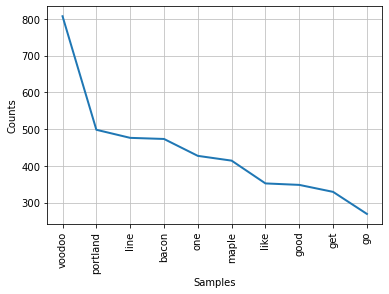

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [53]:
useful_good_reviews=useful_good_reviews.reset_index(drop=True)
words_split_good=[]
for i in range(0,721): 
    for word in useful_good_reviews['text_seperate_new'][i]:
        words_split_good.append(word)
FreqDist(words_split_good).plot(10,cumulative=False)

In [54]:
FreqDist(words_split_good)

FreqDist({'voodoo': 807, 'portland': 498, 'line': 476, 'bacon': 473, 'one': 427, 'maple': 414, 'like': 352, 'good': 348, 'get': 329, 'go': 269, ...})

In [71]:
useful_good_reviews['line']=useful_good_reviews['text_seperate_new'].apply(searchline)
useful_good_reviews['text'][useful_good_reviews['line']==1]

16     Went on a snowy day.  3 people in line.  Reall...
20     OMG. The doughnuts from this place are effin' ...
24     Their donuts are delicious. I would recommend ...
25     Wonderful and delicious donuts. The staff was ...
36     Best apple fritter we have ever had!!!! We jus...
                             ...                        
710    A must visit if you're coming to Portland - fu...
715    This is the world's spookiest donut place. Whe...
717    So is this the only reason to visit Portland? ...
719    Hard to beat these guys.   They have so many v...
720    5 stars for the experience. This place has bee...
Name: text, Length: 325, dtype: object

The donought with maple and bacon is really popular, and we check the menu, there is only maple bacon bar include these two things. That may be the best doughnut in this bakery. And we also checked the word line in these useful good reviews, the reviews with high stars and positive sentimental tendency with word line are saying there are less people in line or short lines.

## Review stars with time

In [164]:
type(bakery_pop['date'][0])

str

In [167]:
import datetime
import time

In [169]:
datetime.datetime.strptime(bakery_pop['date'][0], "%Y-%m-%d %H:%M:%S")

datetime.datetime(2017, 7, 4, 4, 47, 46)

In [184]:
bakery_pop['year'] = pd.DatetimeIndex(bakery_pop['date']).year

In [187]:
bakery_pop['stars'].groupby(bakery_pop['year']).mean()

year
2005    4.333333
2006    4.444444
2007    4.391892
2008    4.082840
2009    3.904025
2010    3.787698
2011    3.721670
2012    3.705575
2013    3.602603
2014    3.378656
2015    3.293764
2016    3.387597
2017    3.528620
2018    3.662636
2019    3.576854
2020    3.934272
2021    4.062500
Name: stars, dtype: float64

In [193]:
bakery_pop.groupby(bakery_pop['year']).count()

,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_seperate,polarity,subjectivity,timestimp
year,,,,,,,,,,,,,,
2005,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2006,18,18,18,18,18,18,18,18,18,18,18,18,18,18
2007,74,74,74,74,74,74,74,74,74,74,74,74,74,74
2008,169,169,169,169,169,169,169,169,169,169,169,169,169,169
2009,323,323,323,323,323,323,323,323,323,323,323,323,323,323
2010,504,504,504,504,504,504,504,504,504,504,504,504,504,504
2011,503,503,503,503,503,503,503,503,503,503,503,503,503,503
2012,574,574,574,574,574,574,574,574,574,574,574,574,574,574
2013,999,999,999,999,999,999,999,999,999,999,999,999,999,999


what has happend in 2015,2015,2016

In [200]:
lowstar=bakery_pop[(bakery_pop['year']==2014)|(bakery_pop['year']==2015)|(bakery_pop['year']==2016)]

In [201]:
lowstar

,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_seperate,polarity,subjectivity,timestimp,year
2,2861,OTtbL6x6IARVUqMyH6InMA,CnTaDHiXcNSA4gNG0zRjXg,4CxF8c3MB7VAdY8zFb2cZQ,5.0,0,0,0,Delicious way to spend your calories! They wor...,2015-01-10 14:39:58,"[delicious, way, spend, calories, work, 247]",1.0,1.0,"(2015, 1, 10, 14, 39, 58, 5, 10, -1)",2015
3,3932,YYkldp4fN94GpjCASQWmwA,W0_7ulegFG9nyW4kzxd8Jw,4CxF8c3MB7VAdY8zFb2cZQ,5.0,0,0,0,Best donuts you can get. Just go there. In tow...,2014-05-19 21:03:05,"[best, donuts, get, go, town, weekend, go, nev...",1.0,0.3,"(2014, 5, 19, 21, 3, 5, 0, 139, -1)",2014
4,3706,-LDVTlMb5PNfcG4sVxjqwg,iPtLKxN8CtLG5pN-I7dM2g,4CxF8c3MB7VAdY8zFb2cZQ,5.0,0,0,0,Ummmm maple bacon donuts? Helloooooooo teh awe...,2016-07-11 02:42:01,"[ummmm, maple, bacon, donuts, helloooooooo, te...",1.0,1.0,"(2016, 7, 11, 2, 42, 1, 0, 193, -1)",2016
9,3110,Pxe7cpXrZEZ_PdnP9FDVhw,fhsyRNF7kOM4qPIcxYnC3g,4CxF8c3MB7VAdY8zFb2cZQ,5.0,0,0,0,If you are a Portlander and have not been here...,2014-10-16 18:49:57,"[portlander, shame, town, go, voodoo, doughnut...",1.0,1.0,"(2014, 10, 16, 18, 49, 57, 3, 289, -1)",2014
10,8217,Gb3NJcUFGtkudczP3jhDtg,CCaI0zEPOcdPmJO95GqS0Q,4CxF8c3MB7VAdY8zFb2cZQ,5.0,1,1,2,As an out-of-town donut fiend I was entranced ...,2014-08-14 20:32:17,"[outoftown, donut, fiend, entranced, bewitched...",1.0,0.3,"(2014, 8, 14, 20, 32, 17, 3, 226, -1)",2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9284,5088,TwP1w4oqMpQVnht9CixiRQ,1WbDOjA401nHYfaQQHRujg,4CxF8c3MB7VAdY8zFb2cZQ,1.0,1,1,0,Horrible!!!! My daughter had the Oreo Cookie D...,2015-07-13 01:32:48,"[horrible, daughter, oreo, cookie, doughnut, t...",-0.666667,0.666667,"(2015, 7, 13, 1, 32, 48, 0, 194, -1)",2015
9285,4738,EWq9dpquVk9D_DeBJ0GdeQ,E7dlN0wRUWqaip20pIFSMQ,4CxF8c3MB7VAdY8zFb2cZQ,1.0,0,0,0,yeah....donuts are donuts...just the worst foo...,2014-11-19 20:08:44,"[yeahdonuts, donutsjust, worst, food, planet, ...",-0.75,1.0,"(2014, 11, 19, 20, 8, 44, 2, 323, -1)",2014
9288,6800,Bg0GowgLTP26GP-u1b3iLg,HK6zoLsbHoYYouLt9CJQUw,4CxF8c3MB7VAdY8zFb2cZQ,5.0,0,0,0,this 5 star review is for the boston cream - i...,2015-04-14 00:48:05,"[5, star, review, boston, cream, afraid, try, ...",-0.75,0.9,"(2015, 4, 14, 0, 48, 5, 1, 104, -1)",2015
9291,4487,0pjDizHG4UE9zw3OFBxGiQ,4RH_76OJdfpDfDVnVGfj9g,4CxF8c3MB7VAdY8zFb2cZQ,5.0,0,0,0,soooo yummy my guilty pleasure!!! 24 hours to...,2014-12-27 21:22:17,"[soooo, yummy, guilty, pleasure, 24, hours]",-1.0,1.0,"(2014, 12, 27, 21, 22, 17, 5, 361, -1)",2014


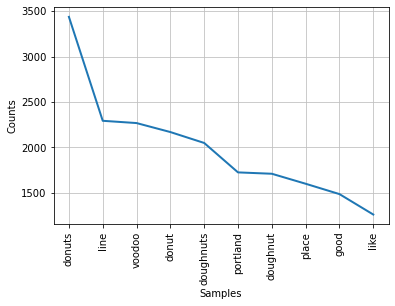

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [203]:
lowstar=lowstar.reset_index(drop=True)
words_split_low=[]
for i in range(0,3628): 
    for word in lowstar['text_seperate'][i]:
        words_split_low.append(word)
FreqDist(words_split_low).plot(10,cumulative=False)

In [216]:
useful_lowstar=lowstar[(lowstar['useful']>0)&(lowstar['stars']<3)&(lowstar['polarity']<0)]

In [221]:
target1=['doughnuts','doughnut','donuts','donut','place','best','great','good','delicious','like','go','get','one']
def removefunctionnew(list1):
    new=[]
    for item in list1:
        if item not in target1:
            new.append(item)
    return new

In [222]:
useful_lowstar['text_seperate_new']=useful_lowstar['text_seperate'].apply(removefunctionnew)
useful_lowstar#.head()

,index,review_id,user_id,business_id,stars,useful,funny,cool,text,date,text_seperate,polarity,subjectivity,timestimp,year,text_seperate_new
0,8911,tcBLu50T9azxLETgOXDSLg,EohFghdL78kvQY-eA1wYfg,4CxF8c3MB7VAdY8zFb2cZQ,1.0,2,1,0,When we moved to Portland I was prepared to br...,2014-08-22 22:54:06,"[moved, portland, prepared, break, nosugar, di...",-0.0,0.513272,"(2014, 8, 22, 22, 54, 6, 4, 234, -1)",2014,"[moved, portland, prepared, break, nosugar, di..."
1,5520,_PSejULcCUFoQjKVvYeo5g,UDLc7HG6oHzRp-ec6oQ45w,4CxF8c3MB7VAdY8zFb2cZQ,2.0,1,1,1,"As a Portland local, I kind of hate this place...",2015-04-09 21:11:32,"[portland, local, kind, hate, place, used, nic...",-0.000223,0.644643,"(2015, 4, 9, 21, 11, 32, 3, 99, -1)",2015,"[portland, local, kind, hate, used, nice, litt..."
2,1658,mSHmNYgCGffvcKUULbvSdQ,QEpNF4Hag6_W9Stc-1Frvg,4CxF8c3MB7VAdY8zFb2cZQ,2.0,1,0,0,"Yes Voodoo's is a Portland institution, but le...",2014-09-12 04:39:55,"[yes, voodoos, portland, institution, lets, fa...",-0.002381,0.46076,"(2014, 9, 12, 4, 39, 55, 4, 255, -1)",2014,"[yes, voodoos, portland, institution, lets, fa..."
3,6327,7zN3eIRf0KbzNQwySigxYQ,f1WvXqw7zX6kEHIaJcR-lA,4CxF8c3MB7VAdY8zFb2cZQ,1.0,2,0,1,I don't understand the hype. I came here when ...,2015-03-17 06:29:31,"[dont, understand, hype, came, first, moved, p...",-0.003788,0.423485,"(2015, 3, 17, 6, 29, 31, 1, 76, -1)",2015,"[dont, understand, hype, came, first, moved, p..."
4,5157,wA-vmKQsILxfXiHS6oxjlA,r6alFgfLv4eWGekrXaLAHg,4CxF8c3MB7VAdY8zFb2cZQ,2.0,8,4,0,This place is a tourist trap.\n\nI find their ...,2015-03-10 23:23:12,"[place, tourist, trap, find, actual, donuts, o...",-0.004545,0.556818,"(2015, 3, 10, 23, 23, 12, 1, 69, -1)",2015,"[tourist, trap, find, actual, ok, designs, add..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2483,X5r21Dm6SwkBY3SFkjCZcQ,PXMu8psJOcL5y6U4m6r2wQ,4CxF8c3MB7VAdY8zFb2cZQ,1.0,2,2,1,can you get worse donut without going to Salem...,2015-12-25 18:13:48,"[get, worse, donut, without, going, salem, don...",-0.4,0.6,"(2015, 12, 25, 18, 13, 48, 4, 359, -1)",2015,"[worse, without, going, salem, dont, want, giv..."
69,6811,GT9_Y2TqHH8EGV0yG9YU7g,ykmMIci0q5QzOp24oA0Sgg,4CxF8c3MB7VAdY8zFb2cZQ,2.0,3,0,1,"Rude service, mediocre donut. Overhyped",2015-06-06 03:49:46,"[rude, service, mediocre, donut, overhyped]",-0.4,0.8,"(2015, 6, 6, 3, 49, 46, 5, 157, -1)",2015,"[rude, service, mediocre, overhyped]"
70,4453,WiNublkMmhuv79Futaqslw,jB4V1f3YH8e3A76PGkJqxg,4CxF8c3MB7VAdY8zFb2cZQ,1.0,1,0,0,This place sucks. Born n raised in Portland an...,2015-07-25 16:02:41,"[place, sucks, born, n, raised, portland, ever...",-0.49,0.58,"(2015, 7, 25, 16, 2, 41, 5, 206, -1)",2015,"[sucks, born, n, raised, portland, everything,..."
71,2572,hR_VbzaRlItHVcqagKeekQ,EU2hfKtSruFerou58aS-Iw,4CxF8c3MB7VAdY8zFb2cZQ,1.0,2,0,0,Worst doughnut I have ever had! Dry and taste...,2015-04-07 18:41:58,"[worst, doughnut, ever, dry, tasted, like, gre...",-0.533333,0.8,"(2015, 4, 7, 18, 41, 58, 1, 97, -1)",2015,"[worst, ever, dry, tasted, grease, ill, stick,..."


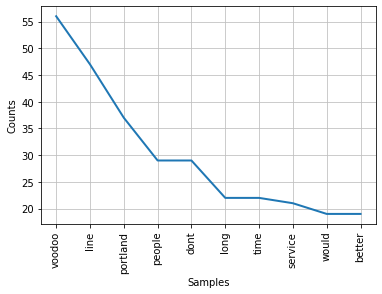

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [223]:
useful_lowstar=useful_lowstar.reset_index(drop=True)
words_split_low=[]
for i in range(0,73): 
    for word in useful_lowstar['text_seperate_new'][i]:
        words_split_low.append(word)
FreqDist(words_split_low).plot(10,cumulative=False)